In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS
from sklearn.dummy import DummyClassifier
import sys
import numpy as np
import sklearn
import string
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import  roc_curve

In [2]:
import streamlit as st

In [3]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns",None)
pd.set_option('display.max_colwidth', None)

<b> The below excel file was generated after removing the empty columns and null row in the 'Task Task Remarks' columns in existing MCN2 dataset. <br> <br>
The 'Task Task Remarks' column had few wordings which had <u>resolved through phone</u> found through the word cloud.<br>
 So additional column name 'resolved_phone' was added which had value 'yes' - if 'Task Task Remarks' column has word phone and 'no' if 'Task Task Remarks' column does not has word phone.</b><br> <br>
<b>
So there are some MCN2 devices which reports fault and can be resolved through phone.
</b>

<b>So from anlysing the 'HD Detailed Decription' through NLP model it can give a result whether can be resolved through phone and field technician not required.</b>

<b>The Usecase would aide the 1CC if it has a chat bot and the chat bot can give a prompt response that this can be resolved through phone.</b>

In [4]:
print("Python version:", sys.version)
print("Version info.:", sys.version_info)
print("pandas version:", pd.__version__)
print("numpy version:", np.__version__)
print("skearn version:", sklearn.__version__)
print("re version:", re.__version__)
print("nltk version:", nltk.__version__)

Python version: 3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]
Version info.: sys.version_info(major=3, minor=10, micro=9, releaselevel='final', serial=0)
pandas version: 1.5.3
numpy version: 1.23.5
skearn version: 1.2.1
re version: 2.2.1
nltk version: 3.7


In [5]:
dfmcnb = pd.read_excel('dfmcn2noNullTaskRemarksJuly21phone.xlsx')

In [6]:
dfmcnb[['HD Description','HD Detailed Decription']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   HD Description          693 non-null    object
 1   HD Detailed Decription  693 non-null    object
dtypes: object(2)
memory usage: 11.0+ KB


In [7]:
dfmcnb[['HD Description','HD Detailed Decription']].nunique()

HD Description            158
HD Detailed Decription    665
dtype: int64

<b>Checking the row info when the resolved_phone had 'yes' in column</b>

In [8]:
dfmcnc = dfmcnb[dfmcnb['resolved_phone'] == 'yes']

In [9]:
dfmcnc.reset_index(drop=True,inplace=True)

In [10]:
dfmcnc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 80 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   BaseE_1_Company                    79 non-null     object        
 1   HD Action Taken                    71 non-null     object        
 2   HD Affected Asset Class ID         79 non-null     object        
 3   HD Affected Asset Recon ID         79 non-null     object        
 4   HD Affected Asset Search           79 non-null     object        
 5   HD Assigned Group                  79 non-null     object        
 6   HD Assigned Support Company        79 non-null     object        
 7   HD Assigned Support Organization   79 non-null     object        
 8   HD Assignee                        79 non-null     object        
 9   HD Assignee Groups                 79 non-null     object        
 10  HD Categorization Tier 1           79 no

In [11]:
# dfmcnc.to_excel('dfmcnResolved_phoneYes.xlsx',index=False)

In [12]:
dfmcnc[dfmcnc['HD Assignee'].isnull()]

,BaseE_1_Company,HD Action Taken,HD Affected Asset Class ID,HD Affected Asset Recon ID,HD Affected Asset Search,HD Assigned Group,HD Assigned Support Company,HD Assigned Support Organization,HD Assignee,HD Assignee Groups,HD Categorization Tier 1,HD Closure Product Category Tier1,HD Closure Product Category Tier2,HD Closure Product Category Tier3,HD Company,HD Description,HD Detailed Decription,HD First Name,Hd Hpd Ci,HD Incident Number,HD InstanceId,HD Last Name,HD Owner Group,HD Phone Number,HD Product Categorization Tier 1,HD Product Categorization Tier 2,HD Product Categorization Tier 3,HD Resolution,HD Resolution Category,HD Site,Hd Srid,HD Submitter,Task Assignee,Task Assignee Group,Task CI Location,Task CI Name,Task CI Recon ID,Task InstanceId,Task Location Company,Task Notes,Task Parent CI ReconID,Task Resolutions,Task RootRequestFormName,Task Summary,Task Task ID,Task Task Remarks,Task TaskName,Task_Accepted_by__Name___c,Task_CI_Description__c,Task_Designation__c,Task_Task_Count__c,HD Closed Date,HD Group Transfers,HD GroupName,HD Impact,HD Individual Transfers,HD Last Resolved Date,HD Priority,HD Reported Date,HD Reported Source,HD Service Type,HD SLM Status,HD Status,HD Status Reason,HD Submit Date,HD Total Transfers,HD Urgency,HD_Site_Visted__c,HD_SLA,idx,Task Actual End Date,Task Actual Start Date,Task Responded Time,Task Scheduled Start Date,Task Sequence,Task Status,Task StatusReasonSelection,Task TaskType,Task_Same_Requestor___c,resolved_phone


In [13]:
dfmcnc[['HD Description','HD Detailed Decription']].info()
dfmcnc[['HD Description','HD Detailed Decription']].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   HD Description          79 non-null     object
 1   HD Detailed Decription  79 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


HD Description            32
HD Detailed Decription    79
dtype: int64

<b>So the HD Detailed Description where it was resolved by phone are all distinct.<br>
So will drop duplicates of HD Detailed description since it would reduce the size of description not resolved by phone
</b>

In [14]:
col_list=['HD Description','HD Detailed Decription','HD Reported Date','HD Closed Date','Task Task ID',
          'Task Actual Start Date','Task Actual End Date','Task Responded Time','Task Task Remarks','resolved_phone']

<b> Checking details of only Phone resolved </b>

In [15]:
dfmcnc[col_list]

,HD Description,HD Detailed Decription,HD Reported Date,HD Closed Date,Task Task ID,Task Actual Start Date,Task Actual End Date,Task Responded Time,Task Task Remarks,resolved_phone
0,(A15) - UCS - IOCT / CPOU - AU is Down,"User encountered error ""AU communcation status is false"" when using IOCT 12 after selecting the Alpha division (A1) and will keep disconnect and connect back after awhile.\r\nUser tried other workstation no issue\r\n\r\nUser will be back on shift tomorrow 3/11/21 at 2000hrs.",2021-11-02 11:13:33,2021-11-11 18:00:29,TAS000000030825,2021-11-03 11:45:17,2021-11-04 00:05:00,2021-11-02 11:37:30,Resolved on the phone at 8am on 4/11.,yes
1,(A15) - TRS - BRS - Unable to Communicate,User reported the UHF is not working after power up.,2021-11-07 23:57:01,2021-11-15 18:06:20,TAS000000031154,2021-11-08 00:33:03,2021-11-08 00:33:03,2021-11-08 00:10:11,Settled thru phone,yes
2,(A15) - DMR - DMR Terminal - DMR Audio Processing Entity (APE),"DMR Recorder encontered ""internet error while trying to playback.\r\nLocation at OPS Centre B3.",2021-11-16 01:35:50,2021-11-23 18:07:01,TAS000000031825,2021-11-16 02:12:26,2021-11-16 02:48:07,2021-11-16 01:49:32,Resolve by phone,yes
3,"(A15) - DMR - NMT - Error: ""Internal Error""","Unable to playback recording, error: ""Internal Error"".",2021-12-03 18:29:52,2021-12-11 18:07:35,TAS000000033511,2021-12-04 03:00:10,2021-12-04 03:00:10,2021-12-03 18:39:19,Appointment on 04/12/21 at 11am\r\nResolved through phone,yes
4,(A15) - TRS - NMT - Others,BB0 NSS NMT detected OP1A-NSS-SW3 port 11 having intermittent flapping.,2021-12-17 00:46:05,2021-12-24 18:00:00,TAS000000034537,2021-12-17 01:30:00,2021-12-17 02:00:00,2021-12-17 01:30:09,Settled through phone,yes
5,(A15) - UCS - NMT - Others,Project team observed BB0 GFE Encryptor 1 faulty during OP1A migration works,2021-12-21 12:36:34,2021-12-28 18:00:53,TAS000000035005,2021-12-21 14:25:43,2021-12-21 14:30:43,2021-12-21 13:48:44,resolved thru phone,yes
6,(A15) - UCS - IOCT / CPOU - AU Not Ready,IOCT having AU not ready error when trying to log in.,2022-02-18 22:03:14,2022-02-26 18:07:48,TAS000000040262,2022-02-18 23:28:56,2022-02-18 23:28:56,2022-02-18 22:12:34,settle thru phone,yes
7,(A15) - UCS - IOCT / CPOU - AU Not Ready,IOCT encountered AU not ready.\r\nUser mentioned that user have restarted the IOCT but issue still persist,2022-02-21 00:11:37,2022-02-28 18:06:15,TAS000000040406,2022-02-21 00:58:15,2022-02-21 00:59:41,2022-02-21 00:18:48,Settled thru phone,yes
8,(A15) - UCS - IOCT / CPOU - Blank Screen,"Located in Cantonment Road PCC\r\nBlack Screen. Able to see mouse cursor, but not responding.",2022-03-18 00:14:26,2022-03-18 00:58:47,TAS000000042394,2022-03-18 00:41:07,2022-03-18 00:50:29,2022-03-18 00:25:43,Resolved thru phone,yes
9,(A15) - UCS - IOCT / CPOU - AU Not Ready,"Unable to log in due to 'AU not ready or another user is logged in' prompt. Advised user to reboot IOCT but issue still persist.\r\nLocation: OP53, level 3",2022-04-03 02:48:43,2022-04-15 18:00:00,TAS000000043765,2022-04-03 03:44:24,2022-04-03 03:44:24,2022-04-03 03:00:28,Resolved through phone,yes


<b>Checking details of whole Data</b>

In [16]:
dfmcnb[col_list]

,HD Description,HD Detailed Decription,HD Reported Date,HD Closed Date,Task Task ID,Task Actual Start Date,Task Actual End Date,Task Responded Time,Task Task Remarks,resolved_phone
0,(A15) - UCS - IOCT - Software Issue - Login/Password Issue,IOCT18 unable to login. Error: No logon server (blue screen)\r\nSA informed unable to remote to workstation.,2021-10-20 12:26:53,2021-10-28 18:00:00,TAS000000029744,2021-10-20 13:36:49,2021-10-20 15:36:49,2021-10-20 12:36:49,with Sir Kiat,no
1,(A15) - SSS - SP01 - Hardware Issue - HDD Faulty,BB0-SSS-SP01E 600GB Hard Disk 11 having amber light,2021-10-21 06:23:03,2021-10-28 18:00:00,TAS000000029776,2021-10-21 08:18:13,2021-10-21 14:15:14,2021-10-21 06:33:28,the faulty hdd will surrender to Syscon.,no
2,(A15) - DMR - NMT - No recording,"Red box recording won't load, internal error.\r\nLocation: B3",2021-10-22 08:22:15,2021-10-29 18:00:00,TAS000000029924,2021-10-22 08:45:00,2021-10-22 09:05:00,2021-10-22 08:44:44,Resolved through phone.,no
3,(A15) - UCS - IOCT / CPOU - Headset extender faulty,IOCT Headset Extender faulty.,2021-10-23 00:30:20,2021-10-30 18:07:11,TAS000000030001,2021-10-23 02:30:58,2021-10-23 03:45:58,2021-10-23 00:44:58,Engineer on site Kenny and Sir Kiat.,no
4,(A15) - TRS - MRS (Data / Vessel) - Unable to Power On,"PC 307 MRS unable to power up.\r\nRadio ID: 2212395\r\nOn 24/10/21 at 0910hrs , contacted LCK base was informed boat available.",2021-10-23 11:20:22,2021-10-31 18:00:20,TAS000000030018,2021-10-24 06:00:29,2021-10-24 07:50:29,2021-10-24 01:17:29,Attended by Kenny and Sir kiat,no
5,(A15) - TRS - MRS - Software Issue - External Party Maintenance,PH 59 No network connection,2021-10-24 05:57:23,2021-11-01 18:00:00,TAS000000030054,2021-10-24 08:00:41,2021-10-24 11:00:41,2021-10-24 06:18:41,Attended by Mohamed Ibrahim and Ahmad Nizam Affandi.,no
6,(A15) - TRS - MRS (Data / Vessel) - Error: MRS DOWN,"User reported that Data MRS down PT 26\r\nFan Meter icon is not present with 3 signal bars. User mentioned they unable to login to Aegis system.\r\nData MRS ISSI: 2212163\r\nVerified that user have restarted the MRS and resecure all cables but issue still persist.\r\nOn 26/10/21 at 1043hrs, user informed that boat is coming back to base and requested for engineer assistance.",2021-10-26 02:11:18,2021-11-02 18:00:00,TAS000000030247,2021-10-26 05:46:03,2021-10-26 06:07:26,2021-10-26 02:52:11,"On 26/10/21 at 1049hrs, Mike Lim requested to escalate case to Ibrahim",no
7,(A15) - TRS - MRS - Hardware Issue - MRS Faulty,Able to transmit but unable to receive messages on Voice MRS\r\nVehicle no.: QX412S\r\n\r\nTried to re-secure palm mic and restart vehicle but issue persist.\r\nCase ref: M2-SD14648,2021-10-26 02:52:01,2021-11-04 18:00:00,TAS000000030253,2021-10-26 03:30:00,2021-10-26 07:15:00,2021-10-26 03:02:07,"backdated with paper SR #114085, sign on behalf of user in remedy",no
8,(A15) - UCS - IOCT / CPOU - Desk Mic faulty,"Deskmic unable to PTT. PTT icon did not turn red. User mentioned that when press on the PTT button, it is need to press aggressively then will be able to PTT.\r\nUser unable to provide IOCT number. \r\nVerified that user have resecured the cable but issue still persist.",2021-10-26 12:21:08,2021-11-02 18:00:00,TAS000000030340,2021-10-26 12:57:36,2021-10-26 13:35:42,2021-10-26 12:29:34,solve through the phone. No site intervention.,no
9,(A15) - TRS - MRS (Data / Vessel) - Unable to Transmit,MRS Data is down and unable to Transmit.\r\nBoat PC 303\r\nNo Fan meter Icon\r\n4 Signal Bars\r\nPSA Grid 4526A\r\nISSI ID: MRS 2212391,2021-10-27 11:48:04,2021-11-04 18:00:00,TAS000000030530,2021-10-28 04:59:19,2021-10-28 07:00:30,2021-10-28 01:51:51,"On 28/10/21 at 0937hrs, contacted LCK Charge office and was informed that boat is available at base today.",no


<b>Drop duplicates of HD Detailed description since it would reduce the size of description not resolved by phone</b>

In [17]:
dfmcnb.drop_duplicates(subset=['HD Detailed Decription'],inplace=True)

In [18]:
dfmcnb.reset_index(drop=True,inplace=True)

### Word Cloud for Each Phone Yes

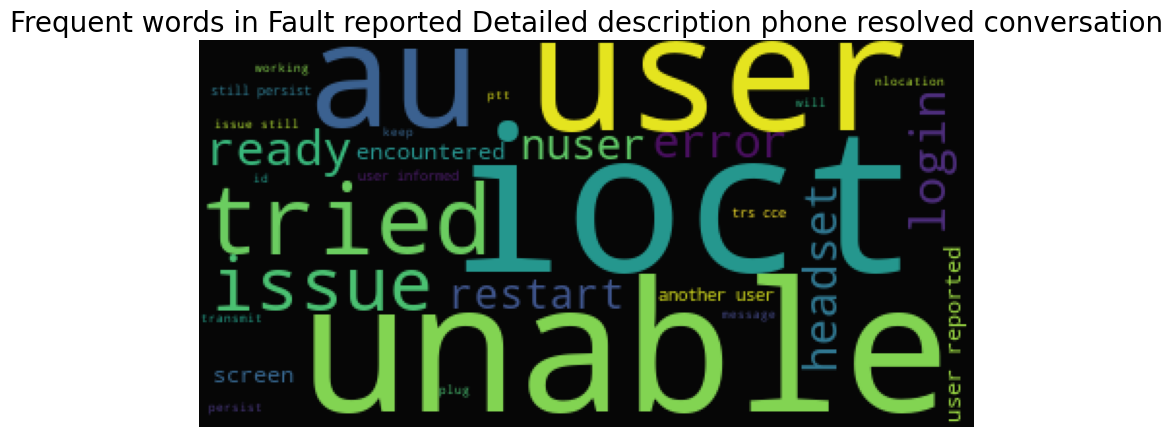

In [19]:
true_comments = str(dfmcnb[dfmcnb.resolved_phone == 'yes']['HD Detailed Decription'].values).lower()
wc = WordCloud(background_color="black", max_words=30, stopwords=STOPWORDS)
wc.generate("".join(true_comments))

plt.figure(figsize=(10,8))
plt.axis("off")
plt.title("Frequent words in Fault reported Detailed description phone resolved conversation", fontsize=20)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()

<H1> MODEL FITTING </H1>

In [20]:
dfmcnb[col_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665 entries, 0 to 664
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   HD Description          665 non-null    object        
 1   HD Detailed Decription  665 non-null    object        
 2   HD Reported Date        665 non-null    datetime64[ns]
 3   HD Closed Date          641 non-null    datetime64[ns]
 4   Task Task ID            665 non-null    object        
 5   Task Actual Start Date  663 non-null    datetime64[ns]
 6   Task Actual End Date    663 non-null    datetime64[ns]
 7   Task Responded Time     665 non-null    datetime64[ns]
 8   Task Task Remarks       665 non-null    object        
 9   resolved_phone          665 non-null    object        
dtypes: datetime64[ns](5), object(5)
memory usage: 52.1+ KB


# 1- yes resolved thorugh phone , 0 - Not resolved through phone

In [21]:
def resolved_phone_conversion(row):
    if row['resolved_phone']=='yes':
        return 1
    else:
        return 0

In [22]:
dfmcnb['resolved_phone_conversion'] = dfmcnb.apply(lambda x: resolved_phone_conversion(x),axis=1)

In [23]:
dfmcnb.groupby('resolved_phone_conversion')['Task Task ID'].nunique().sort_values(ascending=False)

resolved_phone_conversion
0    586
1     79
Name: Task Task ID, dtype: int64

<b>The target column resolved_phone_conversion is imbalanced <b>

In [24]:
col_list.append('resolved_phone_conversion')

In [25]:
col_list

['HD Description',
 'HD Detailed Decription',
 'HD Reported Date',
 'HD Closed Date',
 'Task Task ID',
 'Task Actual Start Date',
 'Task Actual End Date',
 'Task Responded Time',
 'Task Task Remarks',
 'resolved_phone',
 'resolved_phone_conversion']

In [26]:
dfmcnb=dfmcnb[dfmcnb['HD Detailed Decription'].notnull()]
dfmcnb.reset_index(drop=True,inplace=True)

<H1>Text cleaning NLP</H1>

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer # to convert text into a numerical representation using the 
                                                            #TF-IDF (Term Frequency-Inverse Document Frequency) technique
from sklearn.preprocessing import LabelEncoder #to encode the target labels into numerical values
from sklearn.model_selection import train_test_split #to split the dataset into training and testing sets
from sklearn.linear_model import LogisticRegression #to train a logistic regression model
from sklearn.metrics import classification_report #to generate a report of the classification performance
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score

In [28]:
type(dfmcnb)

pandas.core.frame.DataFrame

<b>Remove HTML tags<b>

In [29]:
def remove_html(text):
    """
        Remove the html in sample text
    """
    html = re.compile(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});")
    return re.sub(html, "", text)

In [30]:
# remove html from the text
dfmcnb["HD Detailed Decription"] = dfmcnb["HD Detailed Decription"].apply(lambda x: remove_html(x))

<b>Remove Non-ASCI:</b>

In [31]:
def remove_non_ascii(text):
    """
        Remove non-ASCII characters 
    """
    return re.sub(r'[^\x00-\x7f]',r'', text) # or ''.join([x for x in text if x in string.printable]) 

In [32]:
# remove non-ascii characters from the text
dfmcnb["HD Detailed Decription"] = dfmcnb["HD Detailed Decription"].apply(lambda x: remove_non_ascii(x))

<b>Remove punctuations:</b>

In [33]:
def remove_punct(text):
    """
        Remove the punctuation
    """
#     return re.sub(r'[]!"$%&\'()*+,./:;=#@?[\\^_`{|}~-]+', "", text)
    return text.translate(str.maketrans('', '', string.punctuation))

In [34]:
dfmcnb["HD Detailed Decription"] = dfmcnb["HD Detailed Decription"].apply(lambda x: remove_punct(x))

In [35]:
from nltk.corpus import stopwords

stop = set(stopwords.words('english'))
dfmcnb["HD Detailed Decription"] = dfmcnb["HD Detailed Decription"].apply(lambda x: ''.join([word for word in x if word not in stop]))

<b>stratify=y, the train and test sets will be representative of the distribution of resolved_phone_conversion </b>

In [36]:
X_train, X_test, y_train, y_test = train_test_split(dfmcnb[["HD Detailed Decription"]], dfmcnb[['resolved_phone_conversion']], test_size=0.2, random_state=42, stratify=dfmcnb[['resolved_phone_conversion']])

In [37]:
y_train.value_counts()

resolved_phone_conversion
0                            469
1                             63
dtype: int64

In [38]:
y_test.value_counts()

resolved_phone_conversion
0                            117
1                             16
dtype: int64

In [39]:
print("\n X Train Shape",X_train.shape)
print("\n Y Train Shape",y_train.shape)
print("\n X Test Shape",X_test.shape)
print("\n Y Test Shape",y_test.shape)


 X Train Shape (532, 1)

 Y Train Shape (532, 1)

 X Test Shape (133, 1)

 Y Test Shape (133, 1)


In [40]:
porter = PorterStemmer()

<b>Tokenizing, Stemming</b>

In [41]:
def BoW(corpus):
    # Tokenizing text
    tokenized_docs = [word_tokenize(doc) for doc in corpus]
    
    # Removing punctuation
    pattern = re.compile('[%s]' % re.escape(string.punctuation))
    tokenized_docs_no_punctuation = []
    
    for review in tokenized_docs:
        new_review = []
        for token in review:
            new_token = pattern.sub('', token)
            if not new_token == '':
                new_review.append(new_token)
        tokenized_docs_no_punctuation.append(new_review)
    
    # Stemming 
    preprocessed_docs = []
    for doc in tokenized_docs_no_punctuation:
        final_doc = ''
        for word in doc:
            final_doc = final_doc + ' ' + porter.stem(word)
        preprocessed_docs.append(final_doc)
    
    return preprocessed_docs

<b> Imbalance Technique Apply OverSample SMOTE / RandomUnder Sampling / Combined Over and Under Sampling </b>

In [42]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import resample
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

<b> randomover </b>

In [43]:
# Apply SMOTE to the training set

randomover = RandomOverSampler(sampling_strategy='not majority',random_state=42)
X_train_over, y_train_over = randomover.fit_resample(X_train, y_train)

<b> Under Sampling </b>

In [44]:
#Sampling_strategy=0.5   (Not too much useful information from the majority class is discarded)
undersample=RandomUnderSampler(sampling_strategy=0.5,random_state=42)
# fit and apply the transform
X_under, y_under = undersample.fit_resample(X_train, y_train)

<b> Combine Over Sample and Under Sample</b>

In [45]:
# define dataset
X = X_train
y = y_train
# summarize class distribution
print(Counter(y['resolved_phone_conversion']))
# define oversampling strategy
over = RandomOverSampler(sampling_strategy=0.2,random_state=42)
# fit and apply the transform
X, y = over.fit_resample(X, y)
# summarize class distribution
print(Counter(y['resolved_phone_conversion']))
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy=0.5,random_state=42)
# fit and apply the transform
X_train_OU, y_train_OU = under.fit_resample(X, y)
# summarize class distribution
print(Counter(y_train_OU['resolved_phone_conversion']))

Counter({0: 469, 1: 63})
Counter({0: 469, 1: 93})
Counter({0: 186, 1: 93})


<b>Tokenizing, Stemming</b>

In [46]:
preprocessed_X_train = BoW(X_train['HD Detailed Decription'])
preprocessed_X_test = BoW(X_test['HD Detailed Decription'])

In [47]:
X_test.shape

(133, 1)

In [48]:
preprocessed_X_train_over = BoW(X_train_over['HD Detailed Decription'])
preprocessed_X_under = BoW(X_under['HD Detailed Decription'])
preprocessed_X_train_OU = BoW(X_train_OU['HD Detailed Decription'])

## TF-IDF Matrix

The TF-IDF(term frequency-inverse document frequency) is used to evaluate how relevant a word is to a document. TF-IDF for a word is calculated by multiplying two different metrics:
+ Term frequency: Frequency of occurence of a word in a document
+ Inverse document frequency: Calculating the occurence of a word across documents. If the value is close to 0, the more common the word is, i.e. occurs in many documents.

The higher the TF-IDF score, the more relevant the word is in the particular document. 

In [49]:
tfidf_vectorizer_normal = TfidfVectorizer(ngram_range=(1, 3))
tfidf_vectorizer_over = TfidfVectorizer(ngram_range=(1, 3))
tfidf_vectorizer_under = TfidfVectorizer(ngram_range=(1, 3))
tfidf_vectorizer_overUnder = TfidfVectorizer(ngram_range=(1, 3))

<b>TF-IDF for Train Data</b>

In [50]:
trainData = tfidf_vectorizer_normal.fit_transform(preprocessed_X_train)
trainData.shape

(532, 10227)

In [51]:
testData = tfidf_vectorizer_normal.transform(preprocessed_X_test)
testData.shape

(133, 10227)

<b>TF-IDF for Train over sample Data</b>

In [52]:
trainData_over = tfidf_vectorizer_over.fit_transform(preprocessed_X_train_over)
trainData_over.shape

(938, 10227)

In [53]:
testData_over = tfidf_vectorizer_over.transform(preprocessed_X_test)
testData_over.shape

(133, 10227)

<b>TF-IDF for Train under sample Data</b>

In [54]:
trainData_under = tfidf_vectorizer_under.fit_transform(preprocessed_X_under)
trainData_under.shape

(189, 4237)

In [55]:
testData_under = tfidf_vectorizer_under.transform(preprocessed_X_test)
testData_under.shape

(133, 4237)

<b>TF-IDF for Train combined over and under Data</b>

In [56]:
trainData_OU   = tfidf_vectorizer_overUnder.fit_transform(preprocessed_X_train_OU)
trainData_OU.shape

(279, 5498)

In [57]:
testData_OU = tfidf_vectorizer_overUnder.transform(preprocessed_X_test)
testData_OU.shape

(133, 5498)

In this case, C is the inverse of $\lambda$:
- large C = small $\lambda$ = less regularization
- small C = large $\lambda$ = more regularization

<b> Logistic Regression </b>

In [58]:
model = LogisticRegression(max_iter=20000, random_state=42)

In [59]:
model.fit(trainData,y_train['resolved_phone_conversion'])

LogisticRegression(max_iter=20000, random_state=42)

In [60]:
y_pred = model.predict(testData)
print(classification_report(y_test['resolved_phone_conversion'], y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       117
           1       0.00      0.00      0.00        16

    accuracy                           0.88       133
   macro avg       0.44      0.50      0.47       133
weighted avg       0.77      0.88      0.82       133



C:\Users\70011451\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\70011451\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\70011451\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
accuracy_score = metrics.accuracy_score(y_pred, y_test['resolved_phone_conversion'])
print("Accuracuy Score: ",accuracy_score)

Accuracuy Score:  0.8796992481203008


<b>Balanced accuracy is more suitable for imbalanced datasets</b>

In [62]:
balanced_accuracy_score(y_test['resolved_phone_conversion'], y_pred)

0.5

In [63]:
print("Test AUROC metric for the LogisticRegression",roc_auc_score(y_test['resolved_phone_conversion'], model.predict_proba(testData)[:, 1]))

Test AUROC metric for the LogisticRegression 0.7302350427350428


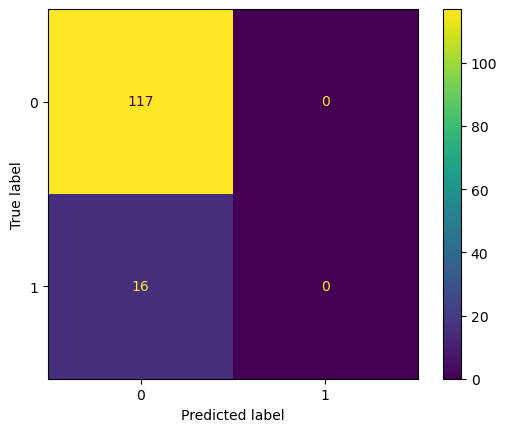

In [64]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred, labels=model.classes_), display_labels= model.classes_)
disp.plot()

<h1>Finding the F1,Precision, Recall curve for log model wihtout doing imbalance method</h1>

In [65]:
logit = LogisticRegression(max_iter=5000, random_state=42)

In [66]:
logit.fit(trainData, y_train['resolved_phone_conversion'])

LogisticRegression(max_iter=5000, random_state=42)

In [67]:
probs = logit.predict_proba(testData)
probs

array([[0.92826883, 0.07173117],
       [0.92084269, 0.07915731],
       [0.66520011, 0.33479989],
       [0.90206964, 0.09793036],
       [0.89576424, 0.10423576],
       [0.93184028, 0.06815972],
       [0.89059998, 0.10940002],
       [0.89338559, 0.10661441],
       [0.96370101, 0.03629899],
       [0.77626908, 0.22373092],
       [0.91817274, 0.08182726],
       [0.90726305, 0.09273695],
       [0.90018675, 0.09981325],
       [0.92206661, 0.07793339],
       [0.79691306, 0.20308694],
       [0.92088281, 0.07911719],
       [0.9386045 , 0.0613955 ],
       [0.80072485, 0.19927515],
       [0.91342553, 0.08657447],
       [0.95616419, 0.04383581],
       [0.92606782, 0.07393218],
       [0.95631748, 0.04368252],
       [0.92151235, 0.07848765],
       [0.93021485, 0.06978515],
       [0.9184717 , 0.0815283 ],
       [0.80326728, 0.19673272],
       [0.83601636, 0.16398364],
       [0.74489493, 0.25510507],
       [0.79318572, 0.20681428],
       [0.83638957, 0.16361043],
       [0.

In [68]:
# The 2nd column contains prob y = 1, which is the one we're interested in
logit_scores = probs[:,1]
logit_scores

array([0.07173117, 0.07915731, 0.33479989, 0.09793036, 0.10423576,
       0.06815972, 0.10940002, 0.10661441, 0.03629899, 0.22373092,
       0.08182726, 0.09273695, 0.09981325, 0.07793339, 0.20308694,
       0.07911719, 0.0613955 , 0.19927515, 0.08657447, 0.04383581,
       0.07393218, 0.04368252, 0.07848765, 0.06978515, 0.0815283 ,
       0.19673272, 0.16398364, 0.25510507, 0.20681428, 0.16361043,
       0.03629899, 0.07959167, 0.20572034, 0.10402507, 0.06854267,
       0.10434336, 0.08776191, 0.05569698, 0.09463142, 0.13189482,
       0.1194618 , 0.17244678, 0.11945646, 0.1386791 , 0.13519034,
       0.07944427, 0.07805   , 0.18850123, 0.12516667, 0.07828832,
       0.101077  , 0.06885119, 0.07223418, 0.14547983, 0.08898388,
       0.14307691, 0.08471215, 0.08880708, 0.19017992, 0.0779229 ,
       0.22285235, 0.05289775, 0.06675241, 0.05325174, 0.07134773,
       0.14734005, 0.06806555, 0.09323272, 0.14070374, 0.08916589,
       0.1673571 , 0.05682342, 0.12717127, 0.06606438, 0.09603

In [69]:
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot as plt

In [70]:
logit_prec, logit_rec, logit_thresholds = precision_recall_curve(y_test, logit_scores, pos_label = True)

<b> Precision Recall Curve</b>

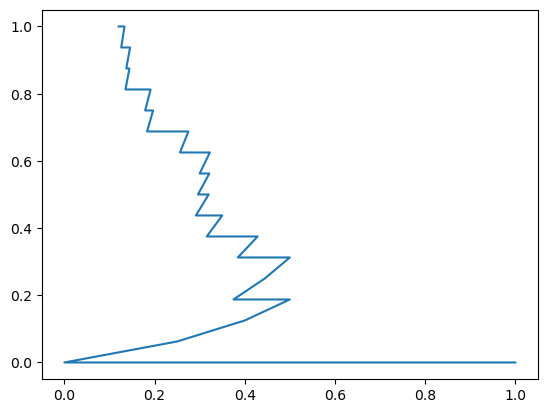

In [71]:
# Plot recall on the x-axis, and precision on the y-axis
plt.plot(logit_prec, logit_rec)

In [72]:
# Compute F1
logit_f1 = 2*logit_prec*logit_rec/(logit_prec + logit_rec)

logit_pr_df = pd.DataFrame(index = logit_thresholds)

# We drop the last entry to make it the same length as thresholds
logit_pr_df['precision'] = logit_prec[:-1]
logit_pr_df['recall'] = logit_rec[:-1]
logit_pr_df['f1'] = logit_f1[:-1]

logit_pr_df

C:\Users\70011451\AppData\Local\Temp\ipykernel_4592\3579865544.py:2: RuntimeWarning: invalid value encountered in divide
  logit_f1 = 2*logit_prec*logit_rec/(logit_prec + logit_rec)


,precision,recall,f1
0.036299,0.120301,1.0000,0.214765
0.043683,0.123077,1.0000,0.219178
0.043836,0.124031,1.0000,0.220690
0.052092,0.125000,1.0000,0.222222
0.052580,0.125984,1.0000,0.223776
0.052898,0.126984,1.0000,0.225352
0.053252,0.128000,1.0000,0.226950
0.055093,0.129032,1.0000,0.228571
0.055697,0.130081,1.0000,0.230216
0.056823,0.131148,1.0000,0.231884


<Axes: >

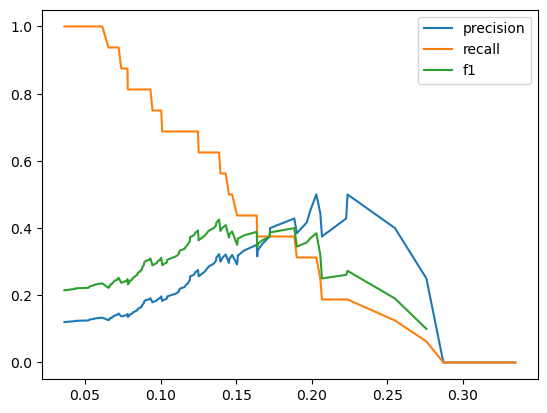

In [73]:
logit_pr_df.plot()

In [74]:
y_pred_log = probs[:,1] > 0.22

print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       117
           1       0.43      0.19      0.26        16

    accuracy                           0.87       133
   macro avg       0.66      0.58      0.60       133
weighted avg       0.84      0.87      0.85       133



In [75]:
balanced_accuracy_score(y_test, y_pred_log)

0.576655982905983

<h2>To Address the imbalance of the dataset oversamling SMOTE is done on Train dataset.</h2>

In [76]:
modellogover = LogisticRegression( max_iter=10000, random_state=42)

In [77]:
modellogover.fit(trainData_over, y_train_over['resolved_phone_conversion'])

LogisticRegression(max_iter=10000, random_state=42)

In [78]:
y_pred_over = modellogover.predict(testData_over)
print(classification_report(y_test['resolved_phone_conversion'], y_pred_over))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       117
           1       0.35      0.38      0.36        16

    accuracy                           0.84       133
   macro avg       0.63      0.64      0.64       133
weighted avg       0.85      0.84      0.84       133



In [79]:
balanced_accuracy_score(y_test['resolved_phone_conversion'], y_pred_over)

0.6404914529914529

In [80]:
print("Test AUROC metric for the LogisticRegression over sample: ",roc_auc_score(y_test['resolved_phone_conversion'], modellogover.predict_proba(testData_over)[:, 1]))

Test AUROC metric for the LogisticRegression over sample:  0.7377136752136751


<b>The precision and recall of 1 ( resolved through phones) is less than 50% so the base model logistic can not be effectively used after using Oversampling method</b>

## UnderSampling

<b>Undersampling can be defined as removing some observations of the majority class. Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback to undersampling is that we are removing information that may be valuable.
We will again use the resampling module from Scikit-Learn to randomly remove samples from the majority class.
</b>

<b>Logistic Regression </b>

In [81]:
modellogunder = LogisticRegression(max_iter=10000, random_state=42,class_weight="balanced")

In [82]:
modellogunder.fit(trainData_under, y_under['resolved_phone_conversion'])

LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42)

In [83]:
print("Test AUROC metric for the LogisticRegression: ",roc_auc_score(y_test['resolved_phone_conversion'], modellogunder.predict_proba(testData_under)[:, 1]))

Test AUROC metric for the LogisticRegression:  0.7580128205128205


In [84]:
y_pred_under = modellogunder.predict(testData_under)
print(classification_report(y_test['resolved_phone_conversion'], y_pred_under))

              precision    recall  f1-score   support

           0       0.94      0.82      0.88       117
           1       0.32      0.62      0.43        16

    accuracy                           0.80       133
   macro avg       0.63      0.72      0.65       133
weighted avg       0.87      0.80      0.82       133



In [85]:
balanced_accuracy_score(y_test['resolved_phone_conversion'], y_pred_under)

0.7227564102564102

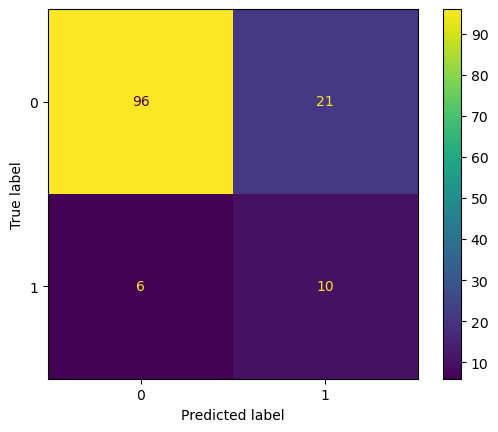

In [86]:
dispunder = ConfusionMatrixDisplay(confusion_matrix(y_test['resolved_phone_conversion'], y_pred_under, labels=modellogunder.classes_), display_labels= modellogunder.classes_)
dispunder.plot()

In [87]:
y_test['resolved_phone_conversion'].value_counts()

0    117
1     16
Name: resolved_phone_conversion, dtype: int64

In [143]:
modellogunder.coef_[0]

array([-0.10053165, -0.04193627, -0.04193627, ..., -0.05475533,
       -0.04948139, -0.04948139])

In [ ]:
coefficients = model.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

<h1>Finding the F1,Precision, Recall curve for log model with undersample imbalance method</h1>

In [88]:
probs_log_under = modellogunder.predict_proba(testData_under)
probs_log_under

array([[0.66268934, 0.33731066],
       [0.65217135, 0.34782865],
       [0.30597602, 0.69402398],
       [0.61404391, 0.38595609],
       [0.58387626, 0.41612374],
       [0.72256082, 0.27743918],
       [0.56071825, 0.43928175],
       [0.59500589, 0.40499411],
       [0.81450765, 0.18549235],
       [0.34257271, 0.65742729],
       [0.62380954, 0.37619046],
       [0.59623594, 0.40376406],
       [0.57153192, 0.42846808],
       [0.62580062, 0.37419938],
       [0.37264707, 0.62735293],
       [0.62972175, 0.37027825],
       [0.68035758, 0.31964242],
       [0.39566159, 0.60433841],
       [0.61488315, 0.38511685],
       [0.80586862, 0.19413138],
       [0.63870822, 0.36129178],
       [0.83301873, 0.16698127],
       [0.65010041, 0.34989959],
       [0.72818462, 0.27181538],
       [0.66851293, 0.33148707],
       [0.43694602, 0.56305398],
       [0.42603468, 0.57396532],
       [0.41270862, 0.58729138],
       [0.39878738, 0.60121262],
       [0.45270907, 0.54729093],
       [0.

In [89]:
# The 2nd column contains prob y = 1, which is the one we're interested in
logit_under_scores = probs_log_under[:,1]
logit_under_scores

array([0.33731066, 0.34782865, 0.69402398, 0.38595609, 0.41612374,
       0.27743918, 0.43928175, 0.40499411, 0.18549235, 0.65742729,
       0.37619046, 0.40376406, 0.42846808, 0.37419938, 0.62735293,
       0.37027825, 0.31964242, 0.60433841, 0.38511685, 0.19413138,
       0.36129178, 0.16698127, 0.34989959, 0.27181538, 0.33148707,
       0.56305398, 0.57396532, 0.58729138, 0.60121262, 0.54729093,
       0.18549235, 0.31850498, 0.61661519, 0.45555085, 0.30368855,
       0.40313524, 0.45054957, 0.22797237, 0.35907323, 0.52472169,
       0.48082337, 0.57965237, 0.47993029, 0.5196372 , 0.48319365,
       0.34504894, 0.37679458, 0.58928402, 0.4983505 , 0.29366939,
       0.43626616, 0.26904958, 0.34862008, 0.54839341, 0.33932351,
       0.57004808, 0.36817232, 0.43604817, 0.63962115, 0.30429326,
       0.63429974, 0.23741659, 0.3046762 , 0.26264684, 0.33244918,
       0.50994981, 0.29983883, 0.44055944, 0.55405685, 0.40557515,
       0.55174173, 0.25018944, 0.47706934, 0.32856875, 0.41874

In [90]:
logit_under_prec, logit_under_rec, logit_under_thresholds = precision_recall_curve(y_test, logit_under_scores, pos_label = True)

<b> Precision Recall Curve</b>

Text(0, 0.5, 'Recall')

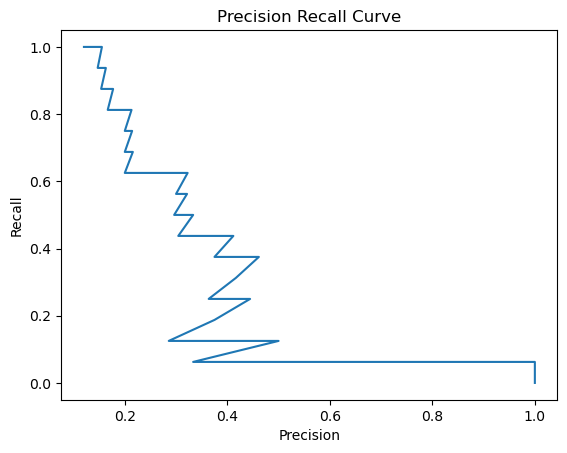

In [91]:
# Plot recall on the x-axis, and precision on the y-axis
plt.plot(logit_under_prec, logit_under_rec)
plt.title("Precision Recall Curve")
plt.xlabel("Precision")
plt.ylabel("Recall")

In [92]:
# Compute F1 logit_under_prec, logit_under_rec
logit_f1_under = 2*logit_under_prec*logit_under_rec/(logit_under_prec + logit_under_rec)

logit_under_df = pd.DataFrame(index = logit_under_thresholds)

# We drop the last entry to make it the same length as thresholds
logit_under_df['precision'] = logit_under_prec[:-1]
logit_under_df['recall'] = logit_under_rec[:-1]
logit_under_df['f1'] = logit_f1_under[:-1]

logit_under_df

,precision,recall,f1
0.166981,0.120301,1.0000,0.214765
0.185492,0.121212,1.0000,0.216216
0.194131,0.124031,1.0000,0.220690
0.227972,0.125000,1.0000,0.222222
0.234619,0.125984,1.0000,0.223776
0.237417,0.126984,1.0000,0.225352
0.242444,0.128000,1.0000,0.226950
0.250189,0.129032,1.0000,0.228571
0.255247,0.130081,1.0000,0.230216
0.262647,0.131148,1.0000,0.231884


Text(0, 0.5, 'Model Metrics')

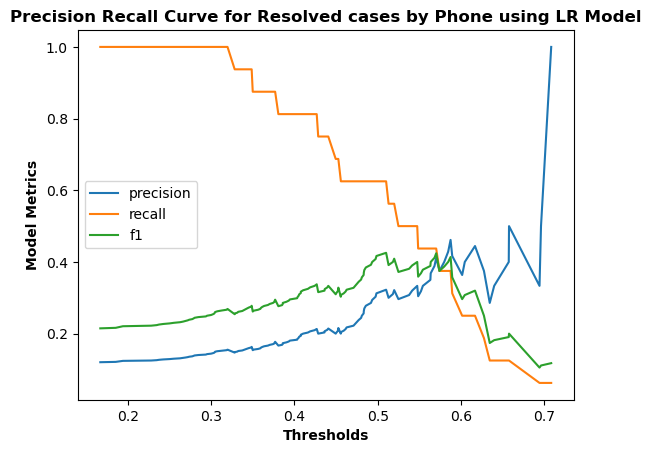

In [93]:
logit_under_df.plot()
plt.title("Precision Recall Curve for Resolved cases by Phone using LR Model", weight='bold')
plt.xlabel("Thresholds",weight='bold')
plt.ylabel("Model Metrics",weight='bold')

In [94]:
y_pred_log_under = probs_log_under[:,1] > 0.6

print(classification_report(y_test['resolved_phone_conversion'], y_pred_log_under))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       117
           1       0.36      0.25      0.30        16

    accuracy                           0.86       133
   macro avg       0.63      0.60      0.61       133
weighted avg       0.84      0.86      0.85       133



In [95]:
balanced_accuracy_score(y_test['resolved_phone_conversion'], y_pred_log_under)

0.5950854700854701

<b> Random Forest</b>

In [96]:
# trainData.shape
# testData
#y_train['resolved_phone_conversion']

#trainData_over
# testData_over
#y_train_over['resolved_phone_conversion']

# trainData_under
# testData_under
#y_under['resolved_phone_conversion']

# trainData_OU
# testData_OU
#y_train_OU
#['resolved_phone_conversion']

In [97]:
rfc = RandomForestClassifier(class_weight="balanced",random_state=0)

In [98]:
rfc.fit(trainData_under, y_under['resolved_phone_conversion'])

RandomForestClassifier(class_weight='balanced', random_state=0)

In [99]:
scoreRg=rfc.score(testData_under, y_test['resolved_phone_conversion'])
scoreRg

0.8120300751879699

In [100]:
testpredrfc = rfc.predict(testData_under)

In [101]:
balanced_accuracy_score(y_test['resolved_phone_conversion'], testpredrfc)

0.6503739316239316

In [102]:
print("Test AUROC metric for the RandomForest Classifier: ",roc_auc_score(y_test['resolved_phone_conversion'], rfc.predict_proba(testData_under)[:, 1]))

Test AUROC metric for the RandomForest Classifier:  0.7518696581196581


In [103]:
print(classification_report(y_test['resolved_phone_conversion'], testpredrfc))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       117
           1       0.30      0.44      0.36        16

    accuracy                           0.81       133
   macro avg       0.61      0.65      0.62       133
weighted avg       0.84      0.81      0.83       133



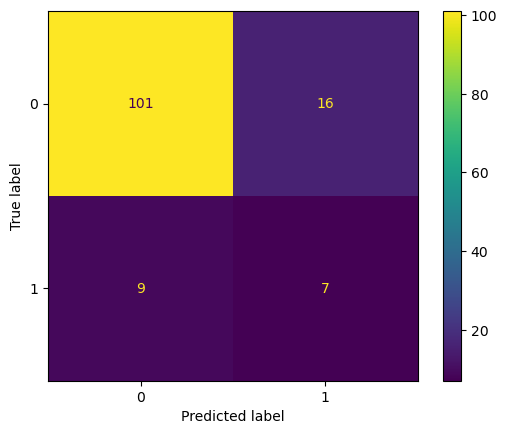

In [104]:
disprfc = ConfusionMatrixDisplay(confusion_matrix(y_test['resolved_phone_conversion'], testpredrfc, labels=rfc.classes_), display_labels= rfc.classes_)
disprfc.plot()

<h2>Finding the F1,Precision, Recall curve for Random Forest model wiht doing undersampling method</h2>

In [105]:
rand_probs = rfc.predict_proba(testData_under)
rand_probs

array([[0.78, 0.22],
       [0.9 , 0.1 ],
       [0.24, 0.76],
       [0.77, 0.23],
       [0.67, 0.33],
       [0.78, 0.22],
       [0.52, 0.48],
       [0.71, 0.29],
       [0.93, 0.07],
       [0.27, 0.73],
       [0.78, 0.22],
       [0.7 , 0.3 ],
       [0.54, 0.46],
       [0.64, 0.36],
       [0.22, 0.78],
       [0.78, 0.22],
       [0.93, 0.07],
       [0.45, 0.55],
       [0.7 , 0.3 ],
       [0.98, 0.02],
       [0.82, 0.18],
       [0.96, 0.04],
       [0.85, 0.15],
       [0.87, 0.13],
       [0.73, 0.27],
       [0.59, 0.41],
       [0.56, 0.44],
       [0.47, 0.53],
       [0.31, 0.69],
       [0.52, 0.48],
       [0.93, 0.07],
       [0.81, 0.19],
       [0.3 , 0.7 ],
       [0.52, 0.48],
       [0.86, 0.14],
       [0.73, 0.27],
       [0.71, 0.29],
       [0.98, 0.02],
       [0.88, 0.12],
       [0.53, 0.47],
       [0.69, 0.31],
       [0.49, 0.51],
       [0.71, 0.29],
       [0.71, 0.29],
       [0.65, 0.35],
       [0.81, 0.19],
       [0.72, 0.28],
       [0.29,

In [106]:
# The 2nd column contains prob y = 1, which is the one we're interested in
rand_scores = rand_probs[:,1]
rand_scores

array([0.22, 0.1 , 0.76, 0.23, 0.33, 0.22, 0.48, 0.29, 0.07, 0.73, 0.22,
       0.3 , 0.46, 0.36, 0.78, 0.22, 0.07, 0.55, 0.3 , 0.02, 0.18, 0.04,
       0.15, 0.13, 0.27, 0.41, 0.44, 0.53, 0.69, 0.48, 0.07, 0.19, 0.7 ,
       0.48, 0.14, 0.27, 0.29, 0.02, 0.12, 0.47, 0.31, 0.51, 0.29, 0.29,
       0.35, 0.19, 0.28, 0.71, 0.42, 0.26, 0.48, 0.07, 0.19, 0.41, 0.21,
       0.54, 0.19, 0.2 , 0.6 , 0.23, 0.59, 0.04, 0.16, 0.02, 0.16, 0.5 ,
       0.25, 0.31, 0.47, 0.27, 0.53, 0.09, 0.37, 0.06, 0.19, 0.32, 0.55,
       0.35, 0.46, 0.11, 0.29, 0.44, 0.11, 0.13, 0.47, 0.2 , 0.37, 0.52,
       0.56, 0.27, 0.14, 0.11, 0.55, 0.13, 0.5 , 0.11, 0.07, 0.48, 0.14,
       0.32, 0.37, 0.38, 0.16, 0.5 , 0.33, 0.5 , 0.6 , 0.52, 0.02, 0.69,
       0.18, 0.42, 0.12, 0.52, 0.03, 0.35, 0.1 , 0.47, 0.04, 0.55, 0.46,
       0.06, 0.37, 0.52, 0.17, 0.27, 0.32, 0.19, 0.13, 0.28, 0.45, 0.42,
       0.27])

In [107]:
rand_prec, rand_rec, rand_thresholds = precision_recall_curve(y_test['resolved_phone_conversion'], rand_scores, pos_label = True)

Text(0, 0.5, 'Recall')

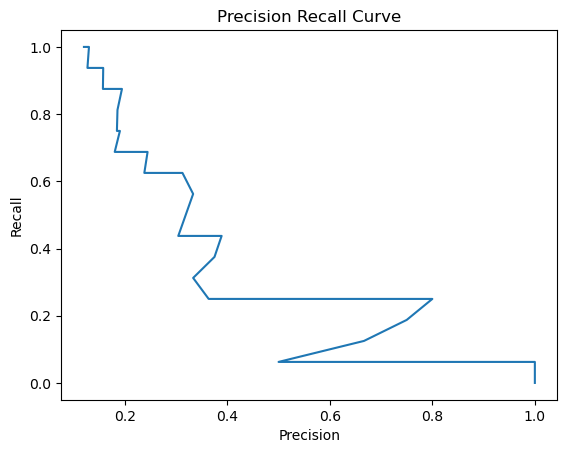

In [108]:
# Plot recall on the x-axis, and precision on the y-axis
plt.plot(rand_prec, rand_rec)
plt.title("Precision Recall Curve")
plt.xlabel("Precision")
plt.ylabel("Recall")

In [109]:
# Compute F1
rand_f1 = 2*rand_prec*rand_rec/(rand_prec + rand_rec)

rand_pr_df = pd.DataFrame(index = rand_thresholds)

# We drop the last entry to make it the same length as thresholds
rand_pr_df['precision'] = rand_prec[:-1]
rand_pr_df['recall'] = rand_rec[:-1]
rand_pr_df['f1'] = rand_f1[:-1]

rand_pr_df

,precision,recall,f1
0.02,0.120301,1.0000,0.214765
0.03,0.124031,1.0000,0.220690
0.04,0.125000,1.0000,0.222222
0.06,0.128000,1.0000,0.226950
0.07,0.130081,1.0000,0.230216
0.09,0.127119,0.9375,0.223881
0.10,0.128205,0.9375,0.225564
0.11,0.130435,0.9375,0.229008
0.12,0.135135,0.9375,0.236220
0.13,0.137615,0.9375,0.240000


Text(0, 0.5, 'Model Metrics')

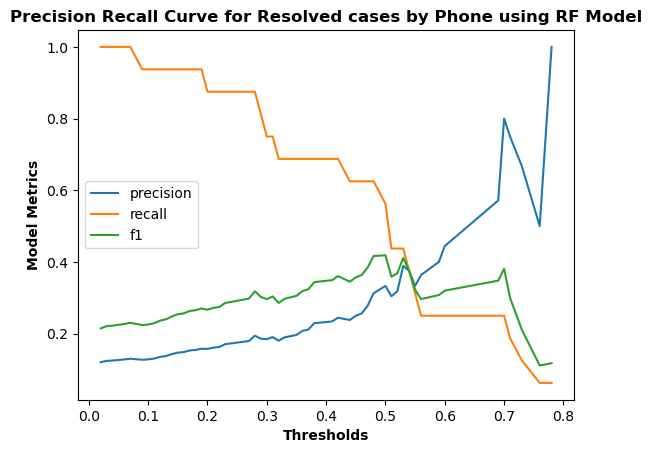

In [110]:
rand_pr_df.plot()
plt.title("Precision Recall Curve for Resolved cases by Phone using RF Model",weight='bold')
plt.xlabel("Thresholds",weight='bold')
plt.ylabel("Model Metrics",weight='bold')

In [111]:
y_pred_rand = rand_probs[:,1] > 0.54

print(classification_report(y_test, y_pred_rand))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       117
           1       0.33      0.31      0.32        16

    accuracy                           0.84       133
   macro avg       0.62      0.61      0.62       133
weighted avg       0.84      0.84      0.84       133



In [112]:
y_pred_rand

array([False, False,  True, False, False, False, False, False, False,
        True, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,

In [113]:
testpredrfc

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int64)

<b> SVC Classifier</b>

In [114]:
# trainData.shape
# testData
#y_train['resolved_phone_conversion']

#trainData_over
# testData_over
#y_train_over['resolved_phone_conversion']

# trainData_under
# testData_under
#y_under['resolved_phone_conversion']

# trainData_OU
# testData_OU
#y_train_OU
#['resolved_phone_conversion']

In [115]:
svc =  SVC(class_weight="balanced",random_state=0)

In [116]:
svc.fit(trainData_under, y_under['resolved_phone_conversion'])
scoresvc=svc.score(testData_under, y_test['resolved_phone_conversion'])
scoresvc

0.8270676691729323

In [117]:
testpredsvc = svc.predict(testData_under)

In [118]:
print(classification_report(y_test['resolved_phone_conversion'], testpredsvc))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       117
           1       0.36      0.56      0.44        16

    accuracy                           0.83       133
   macro avg       0.65      0.71      0.67       133
weighted avg       0.87      0.83      0.84       133



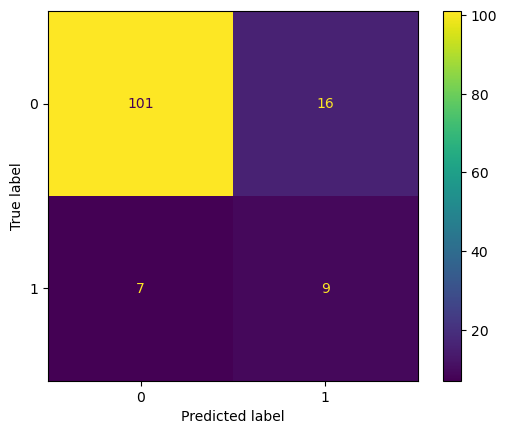

In [119]:
dispsvc = ConfusionMatrixDisplay(confusion_matrix(y_test['resolved_phone_conversion'], testpredsvc, labels=svc.classes_), display_labels= svc.classes_)
dispsvc.plot()

In [120]:
print("Test AUROC metric for SVC Classifier", roc_auc_score(y_test['resolved_phone_conversion'], svc.decision_function(testData_under)))

Test AUROC metric for SVC Classifier 0.7430555555555556


In [121]:
balanced_accuracy_score(y_test['resolved_phone_conversion'], testpredsvc)

0.7128739316239316

In [122]:
f1_score(y_test['resolved_phone_conversion'], testpredsvc)

0.43902439024390244

<b>SVC has a ```.decision_function``` that we can call, to produce "scores" for each sample.</b>

In [123]:
scores_svcdes = svc.decision_function(testData_under)
scores_svcdes

array([-0.71895318, -0.63616808,  0.75121726, -0.4934347 , -0.38202653,
       -0.81826016, -0.32004249, -0.39782085, -1.21279336,  0.53374385,
       -0.5172836 , -0.43991222, -0.36684204, -0.53971487,  0.34127657,
       -0.54296406, -0.84294541,  0.24527691, -0.47854547, -1.16614477,
       -0.60047618, -1.3098588 , -0.58414411, -0.8289605 , -0.74938568,
        0.08930021,  0.06698249,  0.16970895,  0.47691954,  0.02735068,
       -1.21279336, -0.67690193,  0.3530961 , -0.27693474, -0.71998925,
       -0.43265029, -0.29978872, -0.98594602, -0.56531119, -0.0521971 ,
       -0.2140867 ,  0.10634091, -0.20070373,  0.05566258, -0.23555315,
       -0.56620023, -0.53167031,  0.10206314, -0.13775485, -0.75486828,
       -0.34492708, -0.82917192, -0.69104096,  0.07839031, -0.63920435,
        0.03197869, -0.53087885, -0.33775203,  0.2763108 , -0.71785112,
        0.25823682, -0.97522696, -0.68646995, -0.89464753, -0.7577868 ,
       -0.09301877, -0.7266963 , -0.33124605,  0.01469083, -0.40

In [124]:
svc_preds = pd.DataFrame({'actual' : y_test['resolved_phone_conversion'], 'decision function' : scores_svcdes})
svc_preds

,actual,decision function
185,0,-0.718953
644,0,-0.636168
237,0,0.751217
51,0,-0.493435
236,0,-0.382027
68,0,-0.818260
291,0,-0.320042
15,0,-0.397821
341,0,-1.212793
636,1,0.533744


In [125]:
def resolved_phone_conversion2(row):
    if row['actual']==1:
        return 'Yes'
    else:
        return 'No'

In [126]:
svc_preds['conversion'] = svc_preds.apply(lambda x: resolved_phone_conversion2(x),axis=1)

In [127]:
svc_preds

,actual,decision function,conversion
185,0,-0.718953,No
644,0,-0.636168,No
237,0,0.751217,No
51,0,-0.493435,No
236,0,-0.382027,No
68,0,-0.818260,No
291,0,-0.320042,No
15,0,-0.397821,No
341,0,-1.212793,No
636,1,0.533744,Yes


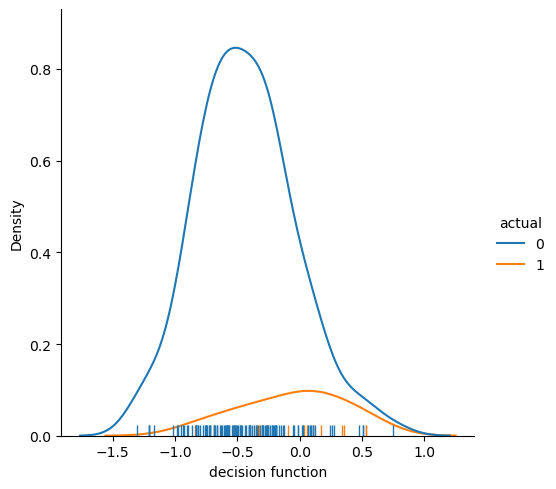

In [128]:
sns.displot(svc_preds, x='decision function', kind="kde", hue='actual', rug=True)

In [129]:
from sklearn.metrics import precision_recall_curve

prec, rec, thresholds = precision_recall_curve(y_test['resolved_phone_conversion'], scores_svcdes, pos_label = True)
prec, rec, thresholds

(array([0.12030075, 0.12121212, 0.12403101, 0.125     , 0.12598425,
        0.12698413, 0.128     , 0.12903226, 0.1300813 , 0.13114754,
        0.1322314 , 0.13333333, 0.13445378, 0.12711864, 0.12820513,
        0.12931034, 0.13043478, 0.13157895, 0.13274336, 0.13392857,
        0.13513514, 0.13636364, 0.13761468, 0.13888889, 0.14018692,
        0.14150943, 0.14285714, 0.14423077, 0.14563107, 0.14705882,
        0.14851485, 0.14      , 0.14141414, 0.14285714, 0.1443299 ,
        0.14583333, 0.14736842, 0.14893617, 0.15053763, 0.15217391,
        0.15384615, 0.15555556, 0.15730337, 0.15909091, 0.16091954,
        0.1627907 , 0.16470588, 0.16666667, 0.1686747 , 0.17073171,
        0.17283951, 0.1625    , 0.16455696, 0.16666667, 0.16883117,
        0.17105263, 0.17333333, 0.17567568, 0.17808219, 0.18055556,
        0.18309859, 0.18571429, 0.1884058 , 0.19117647, 0.19402985,
        0.1969697 , 0.2       , 0.203125  , 0.20634921, 0.20967742,
        0.21311475, 0.2       , 0.20338983, 0.20

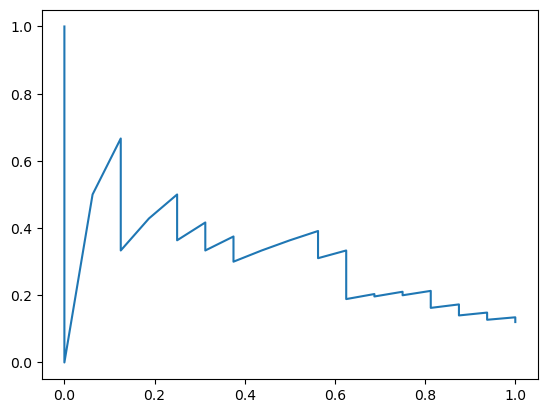

In [130]:
# Plot recall on the x-axis, and precision on the y-axis
plt.plot(rec, prec)

In [131]:
# Compute F1
f1 = 2*prec*rec/(prec + rec)

pr_df = pd.DataFrame(index = thresholds)

# We drop the last entry to make it the same length as thresholds
pr_df['precision'] = prec[:-1]
pr_df['recall'] = rec[:-1]
pr_df['f1'] = f1[:-1]

pr_df

C:\Users\70011451\AppData\Local\Temp\ipykernel_4592\1029588883.py:2: RuntimeWarning: invalid value encountered in divide
  f1 = 2*prec*rec/(prec + rec)


,precision,recall,f1
-1.309859,0.120301,1.0000,0.214765
-1.212793,0.121212,1.0000,0.216216
-1.166145,0.124031,1.0000,0.220690
-1.013738,0.125000,1.0000,0.222222
-0.985946,0.125984,1.0000,0.223776
-0.975227,0.126984,1.0000,0.225352
-0.952409,0.128000,1.0000,0.226950
-0.940749,0.129032,1.0000,0.228571
-0.927673,0.130081,1.0000,0.230216
-0.901733,0.131148,1.0000,0.231884


Text(0, 0.5, 'Model Metrics')

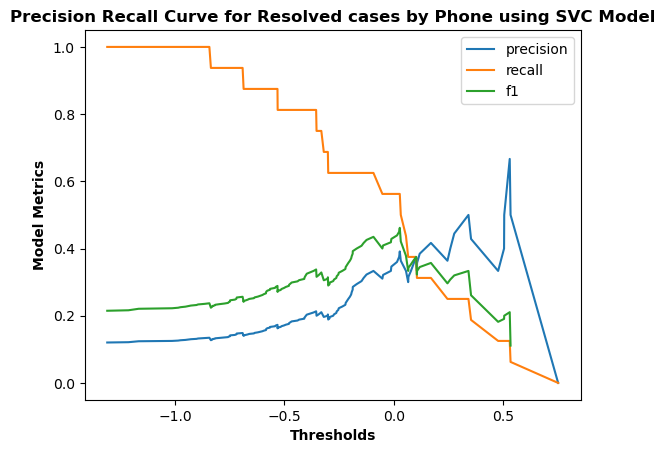

In [132]:
pr_df.plot()
plt.title("Precision Recall Curve for Resolved cases by Phone using SVC Model",weight='bold')
plt.xlabel("Thresholds",weight='bold')
plt.ylabel("Model Metrics",weight='bold')

<b>From this graph, it seems a threshold of arouund 0.3 gives the optimal F1. Let's show the classification report at this threshold:</b>

In [133]:
y_pred_3 = scores_svcdes > 0.4

print(classification_report(y_test, y_pred_3))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       117
           1       0.33      0.12      0.18        16

    accuracy                           0.86       133
   macro avg       0.61      0.55      0.55       133
weighted avg       0.82      0.86      0.84       133



<b>Look at the 'HD Description' column.  'HD Description' is split in to 'HD Product Categorization Tier 1','HD Product Categorization Tier 2','HD Product Categorization Tier 3'</b>

In [134]:
# dfmcnc[['HD Description','HD Detailed Decription',
#         'HD Product Categorization Tier 1','HD Product Categorization Tier 2','HD Product Categorization Tier 3'
#        ,'Task Notes','Task Resolutions']]

# Combining Random Oversampling and Undersampling

<b> Logistic Regression </b>

In [135]:
log_ou = LogisticRegression( max_iter=10000, random_state=42)

In [136]:
log_ou.fit(trainData_OU, y_train_OU['resolved_phone_conversion'])

LogisticRegression(max_iter=10000, random_state=42)

In [137]:
y_pred_ou = log_ou.predict(testData_OU)
print(classification_report(y_test['resolved_phone_conversion'], y_pred_ou))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       117
           1       0.33      0.12      0.18        16

    accuracy                           0.86       133
   macro avg       0.61      0.55      0.55       133
weighted avg       0.82      0.86      0.84       133



In [138]:
balanced_accuracy_score(y_test['resolved_phone_conversion'], y_pred_ou)

0.545405982905983

In [139]:
print("Test AUROC metric for the LogisticRegression over sample: ",roc_auc_score(y_test['resolved_phone_conversion'], log_ou.predict_proba(testData_OU)[:, 1]))

Test AUROC metric for the LogisticRegression over sample:  0.7419871794871795


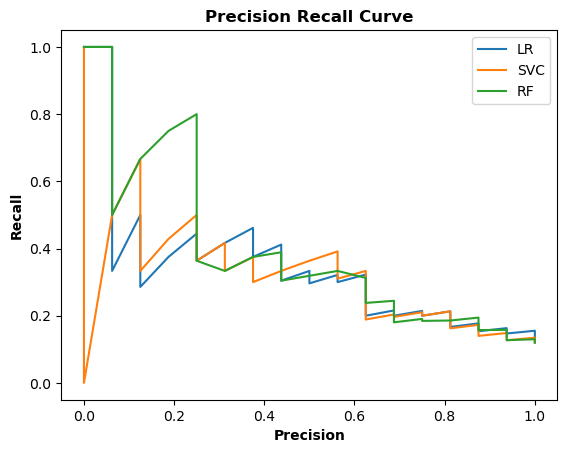

In [140]:
# Plot recall on the x-axis, and precision on the y-axis
plt.plot(logit_under_rec,logit_under_prec , label = 'LR')
plt.plot(rec, prec, label='SVC')
plt.plot( rand_rec,rand_prec ,label = 'RF')
plt.title("Precision Recall Curve", weight = 'bold')
plt.xlabel("Precision", weight = 'bold')
plt.ylabel("Recall",weight = 'bold')
plt.legend()

In [141]:
ns_probs = [0 for _ in range(len(y_test['resolved_phone_conversion']))]
ns_fpr, ns_tpr, _ = roc_curve(y_test['resolved_phone_conversion'],ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test['resolved_phone_conversion'],y_pred_under)
rf_fpr, rf_tpr, _ = roc_curve(y_test['resolved_phone_conversion'],testpredrfc)
svc_fpr,svc_tpr,_ =  roc_curve(y_test['resolved_phone_conversion'],testpredsvc)

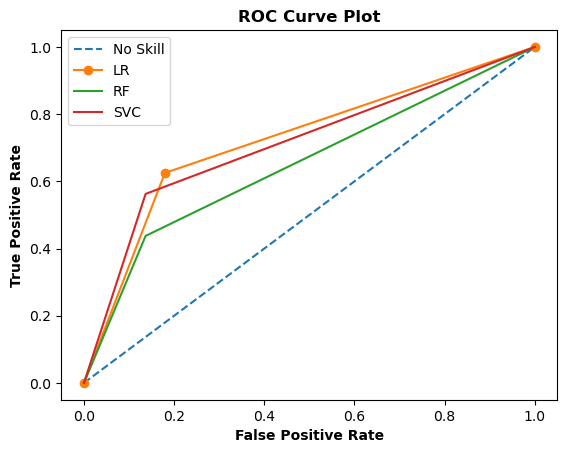

In [142]:
#plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='o',label='LR')
plt.plot(rf_fpr, rf_tpr,label='RF')
plt.plot(svc_fpr,svc_tpr,label='SVC')

plt.title("ROC Curve Plot",weight = 'bold')
plt.xlabel('False Positive Rate',weight = 'bold')
plt.ylabel('True Positive Rate',weight = 'bold')

plt.legend()
plt.show()